# Sperm Detector

精子を検出するアプリ

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

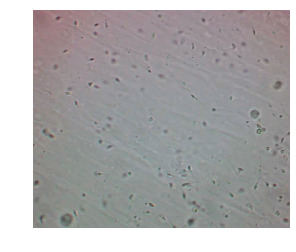

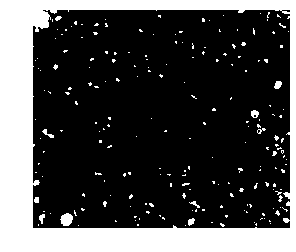

In [2]:
# read and grayscalethe image
img = cv2.imread('../data/sperm.jpg')[:, 216: 1064]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 127, 255, 0)
imgEdge,contours,hierarchy = cv2.findContours(255 - thresh, 1, 2)

# plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

# plot the image
plt.imshow(255 - thresh, cmap='gray')
plt.axis('off')
plt.show()

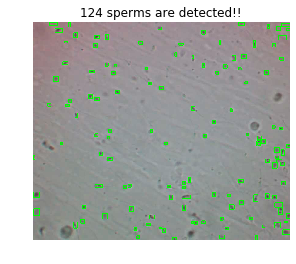

In [6]:
import copy

out_img = copy.copy(img)
count = 0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    area = w * h
    if 50 < area < 500:
        out_img = cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,255,0), 2)
        count += 1

# plot the image
plt.imshow(out_img)
plt.axis('off')
plt.title('{} sperms are detected!!'.format(count))
plt.show()

In [10]:
# save the image
plt.imshow(out_img)
plt.axis('off')
plt.title('{} sperms are detected!!'.format(count))
plt.savefig('../data/detected_sperm.jpg')
plt.close()